# Taste the problems of Zomato


This notebook holds the information about working on sample zomato data to answer questions of stakeholders and generate meaningful solutions to those problems
by identifying the patterns and developing insights.


***Questions to Answer***

- **Do a greater number of restaurants provide online delivery as opposed to offline services?**
- **Which types of restaurants are the most favored by the general public?**
- **What price range is preferred by couples for their dinner at restaurants?**

Import the important libraries to use -

In [1]:
# %pip install numpy pandas seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import prettytable
prettytable.DEFAULT='DEFAULT'

In [3]:
# Lets Collect the data
df=pd.read_csv('D:\\Drive into Analysis\\Zomato Data Analysis\\Zomato-data-.csv')
if df is not None :
    print(df.head(5))
else :
    print('Failed to load the data from the given path')

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
# Check for null values 
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
# Lets Check for DataType
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [6]:
# Since rating is object we need to change it to int and and replace that '/' 
def handle(value):
    value=str(value).split('/')
    value=value[0]
    return value
df['rate']=df['rate'].apply(handle)
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


In [7]:
# Converting rate as int
df['rate']=df['rate'].astype(float)
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [8]:
# There's no null value in given data set lets check the data for statistic values

df.describe(include='all')

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
count,148,148,148,148.000000,148.000000,148.000000,148
unique,145,2,2,NaN,NaN,NaN,4
top,San Churro Cafe,No,No,NaN,NaN,NaN,Dining
freq,2,90,140,NaN,NaN,NaN,110
mean,NaN,NaN,NaN,3.633108,264.810811,418.243243,NaN
std,NaN,NaN,NaN,0.402271,653.676951,223.085098,NaN
min,NaN,NaN,NaN,2.600000,0.000000,100.000000,NaN
25%,NaN,NaN,NaN,3.300000,6.750000,200.000000,NaN
50%,NaN,NaN,NaN,3.700000,43.500000,400.000000,NaN
75%,NaN,NaN,NaN,3.900000,221.750000,600.000000,NaN


From above statistical analysis clears following point :
- Tight clustering in Rate
- Widely spread Values in Votes and Approx_Cost(moderate spread)
- There 145 unique restaurants
- Total count is 148


In [9]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [10]:
# Lets Rename the columns appropriately
df.rename(columns={'name':'Restaurant','online_order':'Online','book_table':'Bookings','rate':'Ratings(5)','votes':'Vote','approx_cost(for two people)':'Average Cost( For 2)','listed_in(type)':'Type'},inplace=True)

In [11]:
# Check the columns wether renamed 
df.head(5)

,Restaurant,Online,Bookings,Ratings(5),Vote,Average Cost( For 2),Type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [12]:
# Normalisation of votes and average cost ( Useful for algorithms that need data within the specific range)

# Z score normalisation used in case of outliers and machine learning models it ranges the value in a proper format and make data clean to analysis
df['Vote']=(df['Vote']-df['Vote'].mean())/df['Vote'].std()

# Min - Max is used to get values in a same range say 0-1 cannot be used when outliers
df['Average Cost( For 2)']=(df['Average Cost( For 2)']-df['Average Cost( For 2)'].min())/(df['Average Cost( For 2)'].max()-df['Average Cost( For 2)'].min())

In [13]:
df.head(5)

,Restaurant,Online,Bookings,Ratings(5),Vote,Average Cost( For 2),Type
0,Jalsa,Yes,Yes,4.1,0.780491,0.823529,Buffet
1,Spice Elephant,Yes,No,4.1,0.798849,0.823529,Buffet
2,San Churro Cafe,Yes,No,3.8,0.999254,0.823529,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,-0.270487,0.235294,Buffet
4,Grand Village,No,No,3.8,-0.151162,0.588235,Buffet


Text(0, 0.5, 'Ratings')

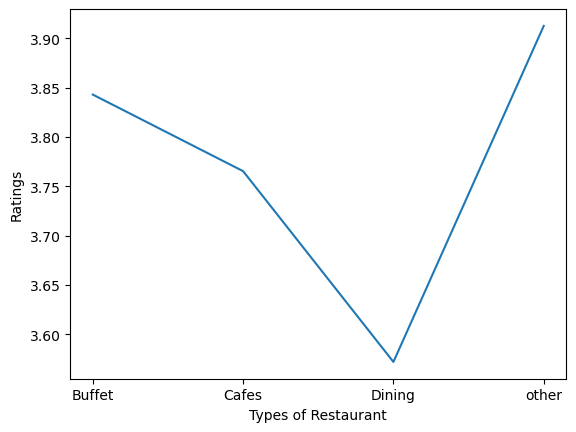

In [14]:
dataa=df.groupby('Type')['Ratings(5)'].mean()
plt.plot(dataa)
plt.xlabel('Types of Restaurant')
plt.ylabel('Ratings')

Text(0.5, 0, 'Types of Restraunt')

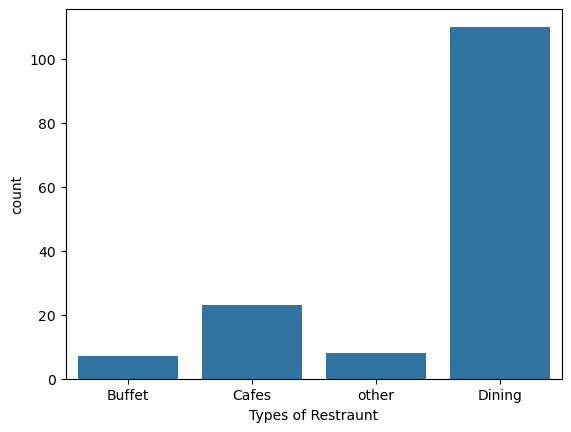

In [15]:
sns.countplot(x=df['Type'])
plt.xlabel('Types of Restraunt')

These shows that there are more number of dining restaurants

Text(0, 0.5, 'Vote')

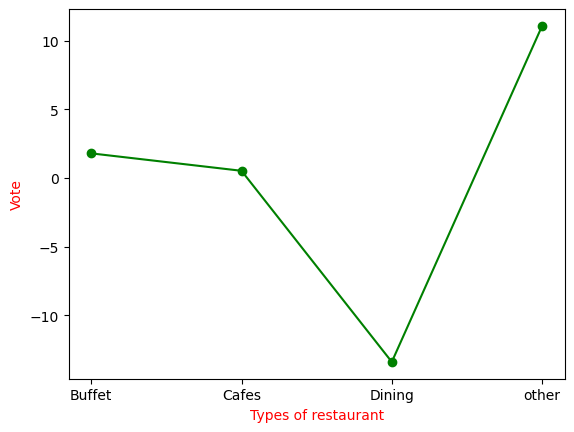

In [16]:
grouped_data=df.groupby('Type')['Vote'].sum()
result=pd.DataFrame(grouped_data)
plt.plot(result,c='green',marker='o')
plt.xlabel('Types of restaurant',c='red')
plt.ylabel('Vote',c='red')


Text(0, 0.5, 'Average Cost For 2')

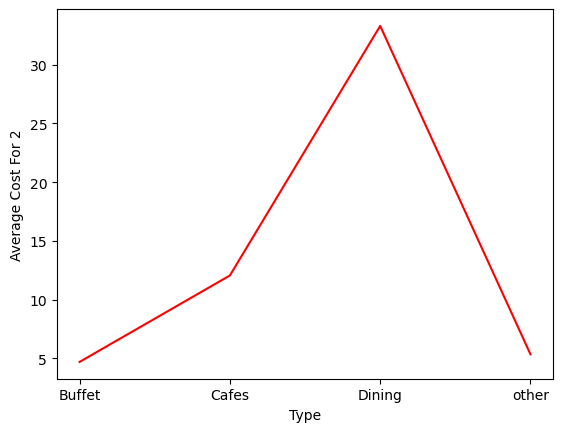

In [17]:
result_1=df.groupby('Type')['Average Cost( For 2)'].sum()
plt.plot(result_1,c='red')
plt.xlabel('Type')
plt.ylabel('Average Cost For 2')

In [18]:
# Create Dummies for Type this help in classify the categorical data and helpful in algorithms that cant process the categorical data

dummy=pd.get_dummies(df['Type'])
dummy.head(5)

,Buffet,Cafes,Dining,other
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [19]:
df=pd.concat([df,dummy],axis=1)
df.head(5)

,Restaurant,Online,Bookings,Ratings(5),Vote,Average Cost( For 2),Type,Buffet,Cafes,Dining,other
0,Jalsa,Yes,Yes,4.1,0.780491,0.823529,Buffet,True,False,False,False
1,Spice Elephant,Yes,No,4.1,0.798849,0.823529,Buffet,True,False,False,False
2,San Churro Cafe,Yes,No,3.8,0.999254,0.823529,Buffet,True,False,False,False
3,Addhuri Udupi Bhojana,No,No,3.7,-0.270487,0.235294,Buffet,True,False,False,False
4,Grand Village,No,No,3.8,-0.151162,0.588235,Buffet,True,False,False,False


In [20]:
df.drop(columns=['Type'],inplace=True)
df.head(5)

,Restaurant,Online,Bookings,Ratings(5),Vote,Average Cost( For 2),Buffet,Cafes,Dining,other
0,Jalsa,Yes,Yes,4.1,0.780491,0.823529,True,False,False,False
1,Spice Elephant,Yes,No,4.1,0.798849,0.823529,True,False,False,False
2,San Churro Cafe,Yes,No,3.8,0.999254,0.823529,True,False,False,False
3,Addhuri Udupi Bhojana,No,No,3.7,-0.270487,0.235294,True,False,False,False
4,Grand Village,No,No,3.8,-0.151162,0.588235,True,False,False,False


In [21]:
df['Buffet'].value_counts()


Buffet
False    141
True       7
Name: count, dtype: int64

In [22]:
df['Cafes'].value_counts()


Cafes
False    125
True      23
Name: count, dtype: int64

In [23]:
df['other'].value_counts()



other
False    140
True       8
Name: count, dtype: int64

In [24]:
df['Dining'].value_counts()

Dining
True     110
False     38
Name: count, dtype: int64

In [25]:
df.describe(include='all')

,Restaurant,Online,Bookings,Ratings(5),Vote,Average Cost( For 2),Buffet,Cafes,Dining,other
count,148,148,148,148.000000,1.480000e+02,148.000000,148,148,148,148
unique,145,2,2,NaN,NaN,NaN,2,2,2,2
top,San Churro Cafe,No,No,NaN,NaN,NaN,False,False,True,False
freq,2,90,140,NaN,NaN,NaN,141,125,110,140
mean,NaN,NaN,NaN,3.633108,-2.400482e-17,0.374404,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.402271,1.000000e+00,0.262453,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2.600000,-4.051096e-01,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.300000,-3.947834e-01,0.117647,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.700000,-3.385630e-01,0.352941,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.900000,-6.587476e-02,0.588235,NaN,NaN,NaN,NaN


In [26]:
# Create Labels for high rating and low rating
bins=np.linspace(df['Ratings(5)'].min(),df['Ratings(5)'].max(),4)
print(bins)
labels=['Low','Average','High']
df['Rating Labels']=pd.cut(df['Ratings(5)'],bins,labels=labels,include_lowest=True)
df.head(5)

[2.6        3.26666667 3.93333333 4.6       ]


,Restaurant,Online,Bookings,Ratings(5),Vote,Average Cost( For 2),Buffet,Cafes,Dining,other,Rating Labels
0,Jalsa,Yes,Yes,4.1,0.780491,0.823529,True,False,False,False,High
1,Spice Elephant,Yes,No,4.1,0.798849,0.823529,True,False,False,False,High
2,San Churro Cafe,Yes,No,3.8,0.999254,0.823529,True,False,False,False,Average
3,Addhuri Udupi Bhojana,No,No,3.7,-0.270487,0.235294,True,False,False,False,Average
4,Grand Village,No,No,3.8,-0.151162,0.588235,True,False,False,False,Average


In [27]:
df['Rating Labels'].value_counts()

Rating Labels
Average    88
High       34
Low        26
Name: count, dtype: int64

In [28]:
df['Online'].value_counts()

Online
No     90
Yes    58
Name: count, dtype: int64

In [29]:
df['Bookings'].value_counts()

Bookings
No     140
Yes      8
Name: count, dtype: int64

Text(0, 0.5, 'Count')

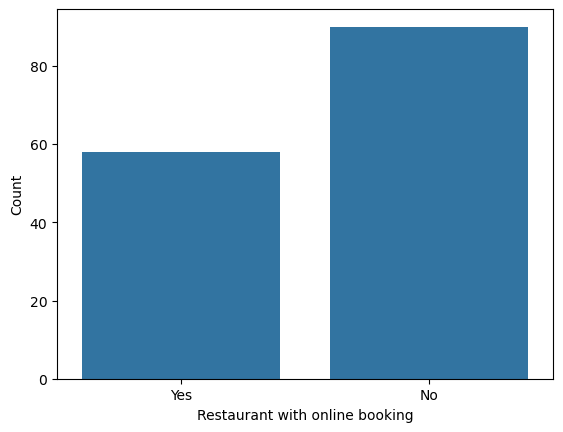

In [30]:
sns.countplot(x=df['Online'])
plt.xlabel('Restaurant with online booking')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

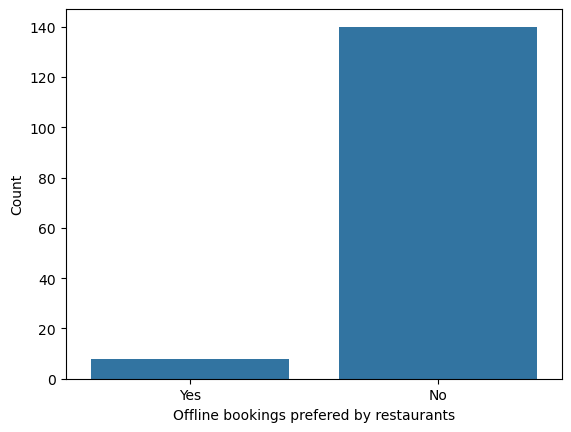

In [31]:
sns.countplot(x=df['Bookings'])
plt.xlabel('Offline bookings prefered by restaurants')
plt.ylabel('Count')

In [ ]:
# We can see a very few restaurants are pre booked mean while a lot of users prefer to online order the food for their comfort 
# Findings from the data are very clear people prefer dining restaurants over any other type of restaurant
# Average Rating of Dining Restaurants are less as compared to other types of  restaurants
# We have used data indicator say data encoding to classify type which is categorical data so it can be easily understand by the model
# Normalisation , Data Bining , Data Encoding are used when we prepare data for the model training models wont understand categorical data so we convert that data as dummies using get_dummies